<a href="https://colab.research.google.com/github/Askarizadeh/Federated-Learning-/blob/main/Dataset_FL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns
torch.cuda.empty_cache()

In [2]:
# Define Gaussian Mixture Model function
def sample_gmm(K, weights, means, covs, M):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    weights = torch.tensor(weights, device=device)
    means = [torch.tensor(mean, device=device) for mean in means]
    covs = [torch.tensor(cov, device=device) for cov in covs]
    normal_distributions = [torch.distributions.MultivariateNormal(mean, cov) for mean, cov in zip(means, covs)]
    categorical_distribution = torch.distributions.Categorical(weights)
    samples = []
    scores = []
    for _ in range(M):
        component_idx = categorical_distribution.sample()
        sample = normal_distributions[component_idx].sample()
        samples.append(sample)
    return torch.stack(samples)

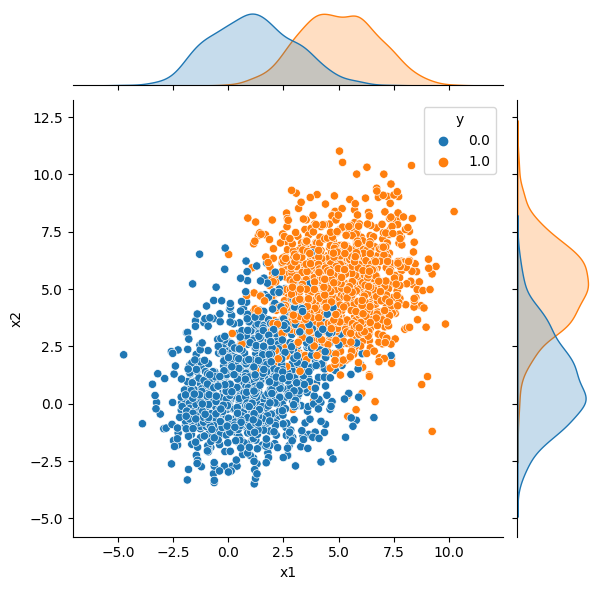

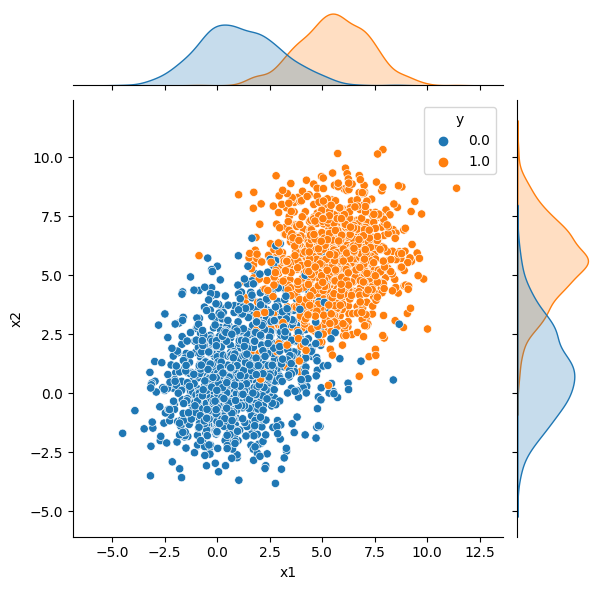

In [4]:
def generate_binary_dataset(y0_params, y1_params):
  samples_y0 = sample_gmm(y0_params['K'], y0_params['weights'], y0_params['means'],
                          y0_params['covs'], y0_params['M']).numpy()
  samples_y1 = sample_gmm(y1_params['K'], y1_params['weights'], y1_params['means'],
                          y1_params['covs'], y1_params['M']).numpy()
  d = {'x1':np.concatenate([samples_y0[:, 0],samples_y1[:, 0]]) ,
      'x2':np.concatenate([samples_y0[:, 1], samples_y1[:, 1]]),
      'y':np.concatenate([np.zeros_like(samples_y0[:, 1]), np.ones_like(samples_y1[:, 1])])}
  data = pd.DataFrame(data=d)
  return data.sample(frac=1)


M1 = 1000
# For Y=0: Define parameters for Gaussian Mixture Model
y0_params = {'K':2, 'weights':[0.5, 0.5], 'means':[[0., 0.], [2., 2.]],
                'covs': [[[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]], 'M': M1}

# For Y=0: Define parameters for Gaussian Mixture Model
y1_params = {'K':2, 'weights':[0.9, 0.1], 'means':[[5., 5.], [6., 6.]],
                'covs': [[[3., 0.], [0., 3.]], [[2., 0.], [0., 2.]]], 'M': M1}

data_s = generate_binary_dataset(y0_params, y1_params)

sns.jointplot(data=data_s, x="x1", y="x2", hue="y")
M1 = 1000
# For Y=0: Define parameters for Gaussian Mixture Model
y0_params = {'K':2, 'weights':[0.5, 0.5], 'means':[[0., 0.], [2., 2.]],
                'covs': [[[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]], 'M': M1}

# For Y=0: Define parameters for Gaussian Mixture Model
y1_params = {'K':2, 'weights':[0.5, 0.5], 'means':[[5., 5.], [6., 6.]],
                'covs': [[[3., 0.], [0., 3.]], [[2., 0.], [0., 2.]]], 'M': M1}

data_t = generate_binary_dataset(y0_params, y1_params)

sns.jointplot(data=data_t, x="x1", y="x2", hue="y")